In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

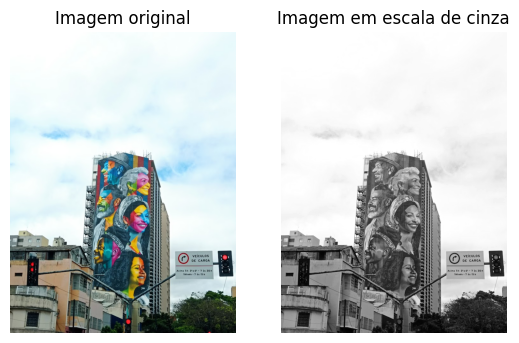

In [2]:
# Leitura de uma imagem colorida
foto = cv2.imread('img/kafka.jpg')

# Exibição da imagem original
plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(cv2.cvtColor(foto, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Conversão RGB para Grayscale
R = foto[:,:,0]  # matriz correspondente à componente RED
G = foto[:,:,1]  # matriz correspondente à componente GREEN
B = foto[:,:,2]  # matriz correspondente à componente BLUE

grayscale_img = 0.299 * R + 0.587 * G + 0.114 * B

# Exibição da imagem em escala de cinza
plt.subplot(1,2,2)
plt.title('Imagem em escala de cinza')
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.show()

## Exercício 7
7. Para imagens em tons de cinza de sua base de imagens <br>
A) Mostre a imagem original e seu histograma correspondente. Implemente uma 
função que realize a equalização de histograma, mostrando o “histograma equalizado” 
e a imagem processada <br>
B) Comente os resultados, fazendo uma breve “crítica” sobre o processamento. Use 
parâmetros estatísticos calculados a partir dos histogramas para discutir

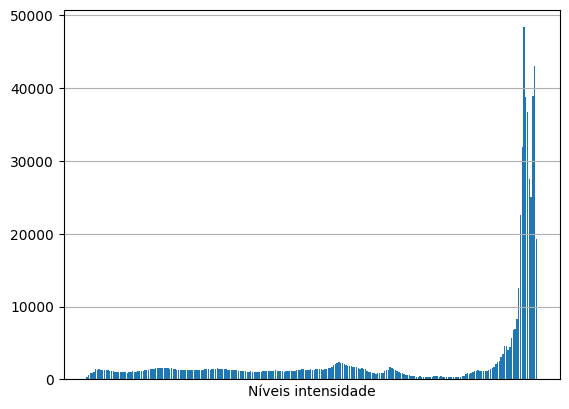

In [12]:
# Função para instanciar o histograma
def instantiate_histogram():    
    hist_array= []
    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)
    
    hist_dct = {hist_array[i]: hist_array[i + 1] for i in range(0, len(hist_array), 2)} 
    return hist_dct

# Função para contar a quantidade de valores de intensidade
def count_intensity_values(hist, img):
    for row in img:
        for column in row:
            hist[str(int(column))] = hist[str(int(column))] + 1
     
    return hist

# Função para plotar o histograma
def plot_hist(hist, gray_img, hist2=''):
    if hist2 != '':
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))
        axarr[0].bar(hist.keys(), hist.values())
        axarr[1].bar(hist2.keys(), hist2.values())
    else:
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Níveis intensidade")
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        plt.show()

histogram = instantiate_histogram()
histogram = count_intensity_values(histogram, grayscale_img)
plot_hist(histogram, grayscale_img)

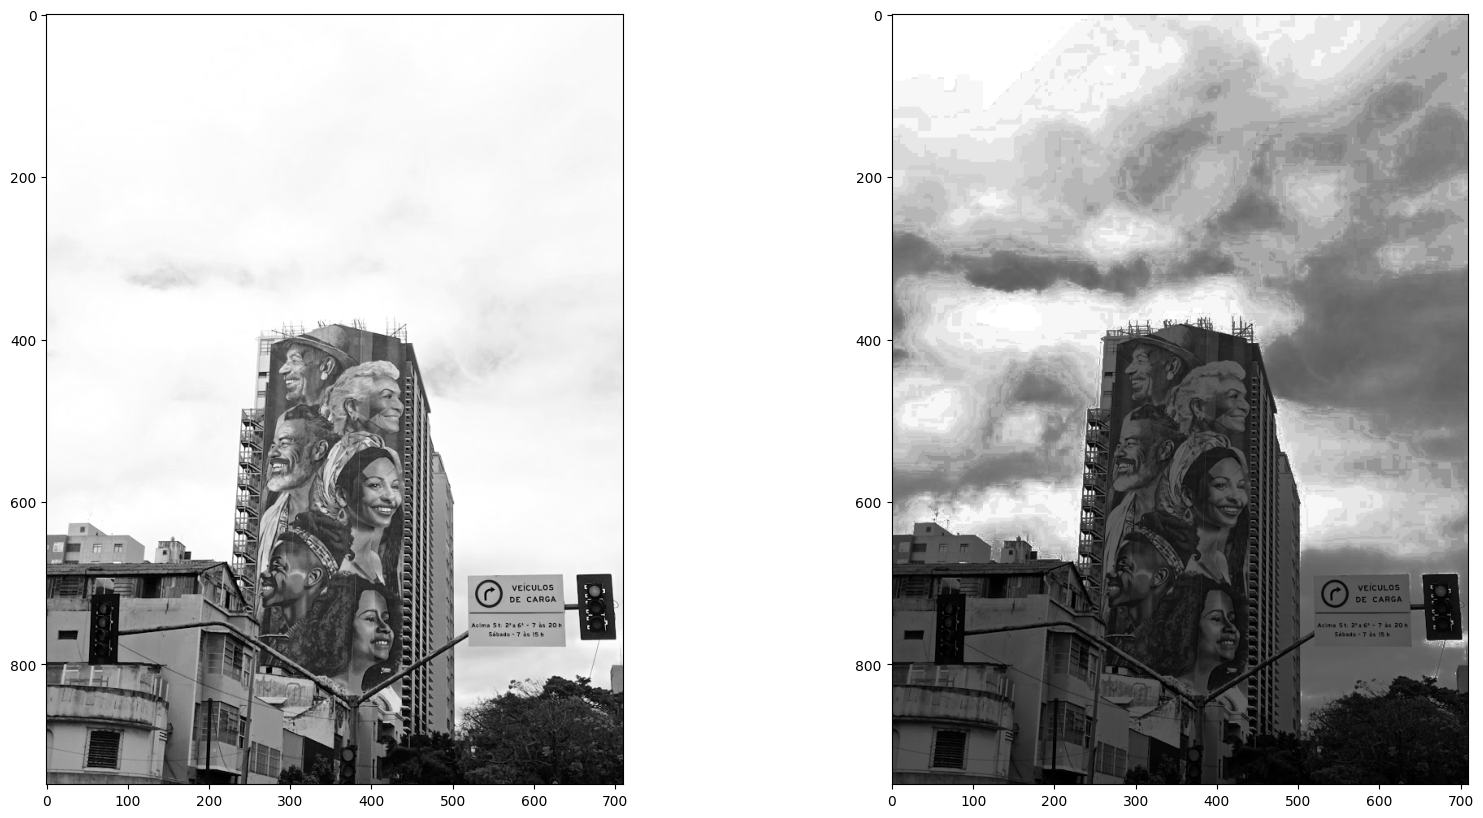

In [13]:
def get_hist_proba(hist, n_pixels):
    hist_proba = {}
    for i in range(0, 256):
        hist_proba[str(i)] = hist[str(i)] / n_pixels
    
    return hist_proba
n_pixels = grayscale_img.shape[0] * grayscale_img.shape[1]
hist_proba = get_hist_proba(histogram, n_pixels)

def get_accumulated_proba(hist_proba): 
    acc_proba = {}
    sum_proba = 0
    
    for i in range(0, 256):
        if i == 0:
            pass
        else: 
            sum_proba += hist_proba[str(i - 1)]
            
        acc_proba[str(i)] = hist_proba[str(i)] + sum_proba
    return acc_proba
accumulated_proba = get_accumulated_proba(hist_proba)

def get_new_gray_value(acc_proba):
    new_gray_value = {}
    
    for i in range(0, 256):
        new_gray_value[str(i)] = np.ceil(acc_proba[str(i)] * 255)
    return new_gray_value
new_gray_value = get_new_gray_value(accumulated_proba)

def equalize_hist(img, new_gray_value):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = new_gray_value[str(int(img[row] [column]))]
            
    return img

eq_img = equalize_hist(grayscale_img.copy(), new_gray_value)
figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(grayscale_img, cmap='gray')
axarr[1].imshow(eq_img, cmap='gray')

## Exercício 8
8. Escolha duas imagens em tons de cinza sobre as quais serão testados diferentes métodos 
abordados durante a disciplina de PDI: a) uma imagem "rica em detalhes" tal como uma 
paisagem, rostos humanos etc (referenciada daqui em diante como IMAG1); b) uma imagem 
com predomínio de formas "artificiais", tal como um escritório vazio com móveis, pinturas 
contendo formas geométricas, cartazes com dígitos/letras (referenciada daqui em diante como 
IMAG2).
A) Aplique um filtro espacial de suavização (ver slides Cap. 3) - e.g.: filtro média, média 
ponderada ou gaussiano - a IMAG1 para dois tamanhos distintos de máscara. 
Comente os resultados.<br>
B) Aplique um filtro espacial de suavização a IMAG2 para dois tamanhos distintos de 
máscara. Comente os resultados.<br>
C) Empregando o Laplaciano, obtenha uma versão aguçada da IMAG1 (ver slides 38-41 
do Cap. 3, parte 4). Comente os resultados.<br>
D) Realize a mesma operação descrita na letra c, porém para a IMAG2. Comente os 
resultados.<br>
E) Aplique o filtro de mediana (ver slides Cap. 5) a IMAG1 para dois tamanhos distintos 
de máscara. Comente os resultados.<br>
F) Aplique o filtro de mediana a IMAG2 para dois tamanhos distintos de máscara. 
Comente os resultados.<br>
G) Aplique o filtro de máximo (ver slides Cap. 5) a IMAG1 para dois tamanhos distintos 
de máscara. Comente os resultados.<br>
H) Aplique o filtro de máximo a IMAG2 para dois tamanhos distintos de máscara. 
Comente os resultados